<a href="https://colab.research.google.com/github/Parthsarthi-lab/Machine-Learning-Projects/blob/main/K_MAENS_Incentivization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (12,6)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/PYTHON/Demo_Datasets.zip (Unzipped Files)/Demo Datasets/Lesson 7/driver-data.csv")
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


**mena_dist_day** represents the ***mean distance*** travelled by the driver per day<br>

**mean_over_speed_perc** represents the mean percentage of the times of driver drove *higher than 5 MPH over the speed limit*

In [ ]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)
df_analyze = df.drop("id",axis=1)

In [ ]:
kmeans.fit(df_analyze)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_  # Centres of the cluster

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [ ]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [ ]:
print(type(kmeans.labels_))
unique,counts = np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


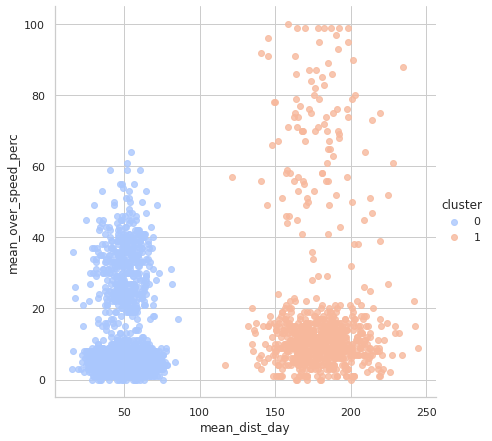

In [ ]:
df_analyze["cluster"] = kmeans.labels_
sns.set_style("whitegrid")
sns.lmplot("mean_dist_day","mean_over_speed_perc",data=df_analyze,hue="cluster",palette="coolwarm",size=6,aspect=1,fit_reg=False)

In [ ]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(df.drop("id",axis=1))
kmeans4.fit(df.drop("id",axis=1))

kmeans4.cluster_centers_  # Centres of the cluster
print(type(kmeans.labels_))
unique,counts = np.unique(kmeans4.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 696, 1: 2775, 2: 104, 3: 425}


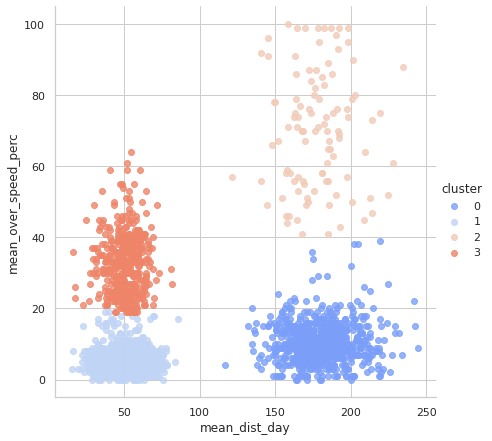

In [ ]:
df_analyze['cluster'] = kmeans4.labels_
sns.set_style("whitegrid")
sns.lmplot("mean_dist_day","mean_over_speed_perc",data=df_analyze,hue="cluster",palette="coolwarm",size=6,aspect=1,fit_reg=False)

We can see that it's more denser and optimal than the previous plot

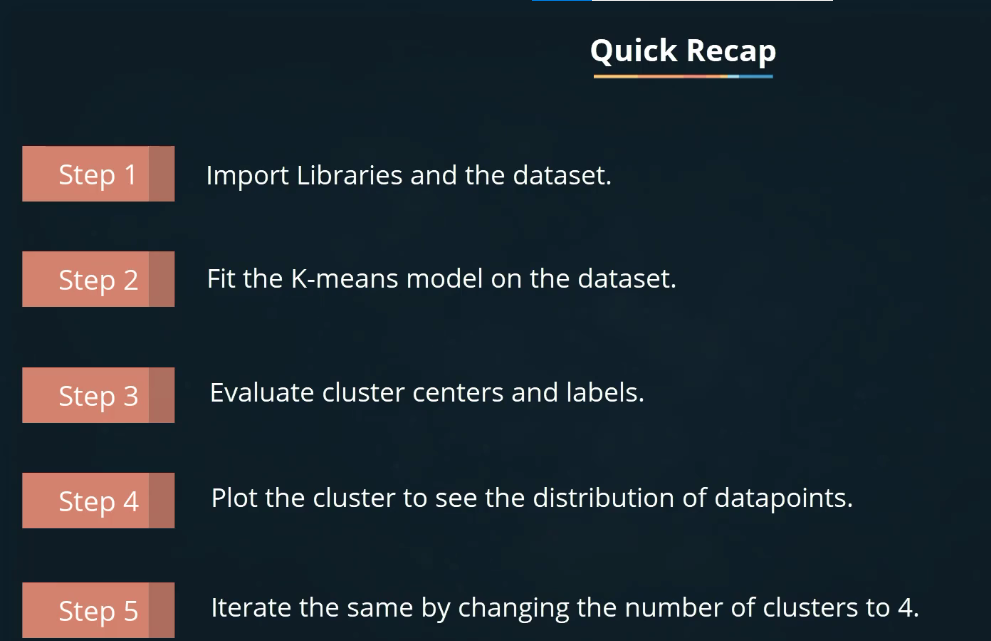

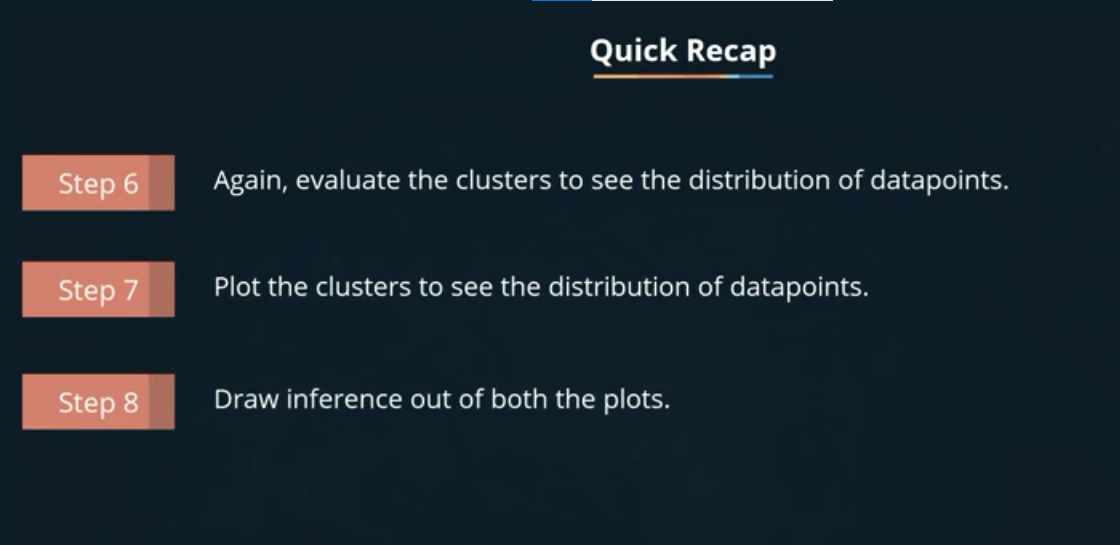